# Introduction to Feature Engineering <font color='blue'></font>

# 0) Importing the right tools <font color='blue'> (5 min) </font>

### <font color='red'>0.1) Import the necessary packages: </font>

- pandas (aliased as pd)
- numpy (aliased as np)
- seaborn (aliased as sns)
- matplotlib.pyplot (aliased as plt)

In [2]:
from __future__ import division

import warnings
warnings.filterwarnings('ignore')

#### IMPORT THE NECESSARY PACKAGES WITH THEIR ALIASES ####
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%pylab inline 

Populating the interactive namespace from numpy and matplotlib


### <font color='red'>0.2) Import the dataset from <i>'../data/my_data_after_simple_prep.csv'</i></font>

In [3]:
raw_data = pd.read_csv('my_data_after_simple_prep.csv')
data = raw_data.copy()

### <font color='red'>0.3) Print samples of data so you are familiar with the data </font>

In [4]:
data.sample(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
803037,164,2015-06-26 14:19:00,2015-06-26 14:22:00,497,E 17 St & Broadway,40.737050,-73.990093,297,E 15 St & 3 Ave,40.734232,-73.986923,20083,Subscriber,1988.0,1
608120,1241,2015-06-20 21:03:00,2015-06-20 21:24:00,537,Lexington Ave & E 24 St,40.740259,-73.984092,116,W 17 St & 8 Ave,40.741776,-74.001497,20249,Customer,1979.0,0


## 1) Weekend, Weekday <font color='blue'> (20 min) </font>

### Weekday

### <font color='red'>1.1) Import the <i>calendar</i> package and get help on it </font>

In [5]:
#### IMPORT THE PACKAGE ####
import calendar

In [6]:
#### CALL HELP ON IT ####
help(calendar)

Help on module calendar:

NAME
    calendar - Calendar printing functions

DESCRIPTION
    Note when comparing these calendars to the ones printed by cal(1): By
    default, these calendars have Monday as the first day of the week, and
    Sunday as the last (the European convention). Use setfirstweekday() to
    set the first day of the week (0=Monday, 6=Sunday).

CLASSES
    builtins.ValueError(builtins.Exception)
        IllegalMonthError
        IllegalWeekdayError
    builtins.object
        Calendar
            HTMLCalendar
                LocaleHTMLCalendar
            TextCalendar
                LocaleTextCalendar
    
    class Calendar(builtins.object)
     |  Calendar(firstweekday=0)
     |  
     |  Base calendar class. This class doesn't do any formatting. It simply
     |  provides data to subclasses.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, firstweekday=0)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
 

### <font color='red'>1.2) Run the following block, so it changes starttime and stoptime columns of <i>data</i> to the right <i>datetime</i> format </font>

In [7]:
data['starttime'] = pd.to_datetime(data['starttime'], format="%Y-%m-%d %H:%M")
data['stoptime'] = pd.to_datetime(data['stoptime'], format="%Y-%m-%d %H:%M")

In [8]:
data.sample(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
212053,645,2015-06-08 20:03:00,2015-06-08 20:14:00,499,Broadway & W 60 St,40.769155,-73.981918,465,Broadway & W 41 St,40.755136,-73.98658,19320,Subscriber,1987.0,2


### <font color='red'>1.3) Run the following block with different day indexes, so you can see what <i>calendar.day_name[index_day]</i> returns </font>

In [9]:
index_day = range(0,7)
for i in index_day:
    print (i, calendar.day_name[i])

0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday
6 Sunday


### <font color='red'>1.4) Run the following block so you get the day index of a given observation, as well as its week-day using <i>calendar</i></font>

In [10]:
example_observation = data.iloc[800000] #take the first row data

In [11]:
print(example_observation)

tripduration                                    365
starttime                       2015-06-26 12:51:00
stoptime                        2015-06-26 12:57:00
start station id                                265
start station name         Stanton St & Chrystie St
start station latitude                    40.722293
start station longitude                  -73.991475
end station id                                  150
end station name                  E 2 St & Avenue C
end station latitude                      40.720874
end station longitude                    -73.980858
bikeid                                        16219
usertype                                 Subscriber
birth year                                   1988.0
gender                                            1
Name: 800000, dtype: object


In [12]:
print("starttime:", example_observation.starttime)

starttime: 2015-06-26 12:51:00


In [13]:
print("starttime weekday index:", example_observation.starttime.weekday())

starttime weekday index: 4


In [14]:
day_index = example_observation.starttime.weekday()
print("starttime weekday name:", calendar.day_name[day_index])

starttime weekday name: Friday


In [15]:
example_observation = data.iloc[0] #take the first row data
print(example_observation)
print("starttime:", example_observation.starttime)
print("starttime weekday index:", example_observation.starttime.weekday())
print("starttime weekday name:", calendar.day_name[example_observation.starttime.weekday()])

tripduration                                   1338
starttime                       2015-06-01 00:00:00
stoptime                        2015-06-01 00:22:00
start station id                                128
start station name         MacDougal St & Prince St
start station latitude                    40.727103
start station longitude                  -74.002971
end station id                                 2021
end station name                    W 45 St & 8 Ave
end station latitude                      40.759291
end station longitude                    -73.988597
bikeid                                        20721
usertype                                 Subscriber
birth year                                   1984.0
gender                                            1
Name: 0, dtype: object
starttime: 2015-06-01 00:00:00
starttime weekday index: 0
starttime weekday name: Monday


In [16]:
data.sample(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
57598,1657,2015-06-03 19:59:00,2015-06-03 20:27:00,168,W 18 St & 6 Ave,40.739713,-73.994564,259,South St & Whitehall St,40.701221,-74.012342,21689,Subscriber,1969.0,1
137711,622,2015-06-06 15:08:00,2015-06-06 15:18:00,276,Duane St & Greenwich St,40.717488,-74.010455,368,Carmine St & 6 Ave,40.730386,-74.002150,19882,Subscriber,1988.0,2


### <font color='red'>1.5) Create a column in the dataframe, containing the day of the week of a given trip. You can use the following functions:</font>
- pd.column_name.apply()
- calendar.day_name[day_number_here] (notice the brackets)
- datetime.weekday()

<font color='green'> <b>Any function can be passed to pd.column_name.apply(name_of_your_function), for instance you could use the <i>lambda functions</i></b>:
- new_column = pd.column_name.apply(lambda x: x.attribute_of_x) will create a new column, based on the attributes of elements of the old column.<font color='green'>

In [17]:
# apply akan mengimplementasikan fungsi ke setiap row
data['start_day'] = data["starttime"].apply(lambda x: calendar.day_name[x.weekday()])
# x mengacu pada data['starttime']
#### ADD THE DAY OF THE WEEK IN THIS NEW DATAFRAME COLUMN ####

In [18]:
data['start_day_again'] = data.apply(lambda x: calendar.day_name[x['starttime'].weekday()], axis = 1)

In [19]:
data['start_day_again'].sample(3)

7583        Monday
421980      Monday
141883    Saturday
Name: start_day_again, dtype: object

### <font color='red'>1.6) Print samples of data to make sure the column has been created successfully </font>

In [20]:
col = ['starttime', 'start_day']
data[col].sample(2)

,starttime,start_day
430725,2015-06-15 13:35:00,Monday
478325,2015-06-17 06:51:00,Wednesday


### <font color='red'>1.7) Use the <i>seaborn</i> package, and more specifically <i>sns.countplot</i>, to plot the number of trips per week day</font>

Text(0.5,1,'Number of Trips by Weekday')

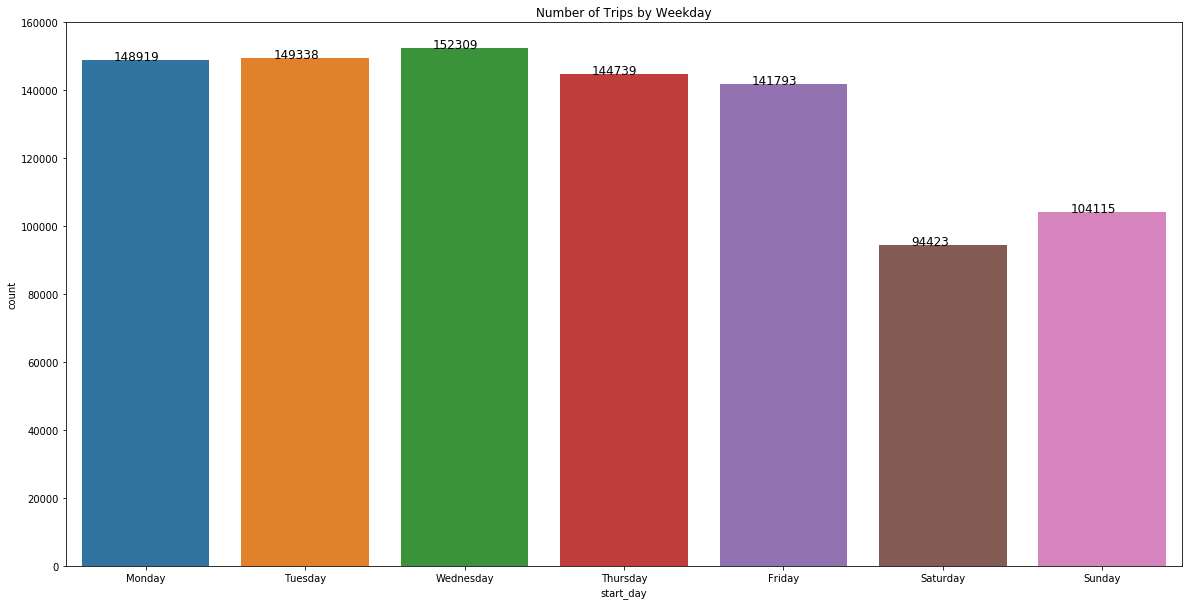

In [21]:
plt.figure(figsize=[20,10])
g = sns.countplot(data['start_day'])
for p in g.patches:
    g.text(p.get_x()+0.2, p.get_height()+1, '%i' % p.get_height(), size = 12) 
    
plt.title('Number of Trips by Weekday')

Kelihatan bahwa di saat weekend orang cenderung jarang menggunakan sepeda.

### <font color='red'>1.8) Define a new binary column, with True if day is on the weekend, False otherwise. You can use the <i>pandas.column_name.apply(your_function_here)</i> function.</font>

In [22]:
data['is_weekend'] = data['start_day'].apply(lambda x: 1 if (x == 'Saturday' or x == 'Sunday') else 0)
##### NEW BINARY COLUMN, 1 IF OBSERVATION IS A WEEKEND TRIP, 0 OTHERWISE ####
                    #### YOU CAN USE A LAMBDA FUNCTION HERE like this : .apply(lambda x: x in set_to_check) ####

### <font color='red'>1.9) Plot samples of data to check success of operation</font>

In [23]:
col = ['start_day', 'is_weekend']
data[col].sample(5)

,start_day,is_weekend
517369,Thursday,0
533616,Thursday,0
865743,Monday,0
507600,Wednesday,0
448581,Tuesday,0


## 2) Morning/afternoon/evening/night <font color='blue'> (15 min) </font>

### <font color='red'>2.1) Define a function that returns a string depending on its parameter x. If:</font>
- x.hour is strictly under 6 or strictly over 22, return 'night'
- x.hour is strictly over 18 and under 22, return 'evening'
- x.hour is strictly over 12 and under 18, return 'afternoon'
- otherwise return 'morning'

In [24]:
def time_of_day(x):
    if x.hour < 6 or x.hour >= 22:    #### COMPLETE THE FUNCTION BELOW ####
        return 'night'
    elif x.hour > 18 and x.hour < 22:
        return 'evening'
    elif x.hour >= 12 and x.hour <= 18:
        return 'afternoon'
    else:
        return 'morning'

In [25]:
print(data.iloc[853867])

tripduration                                  1364
starttime                      2015-06-28 18:40:00
stoptime                       2015-06-28 19:03:00
start station id                               225
start station name         W 14 St & The High Line
start station latitude                   40.741951
start station longitude                  -74.00803
end station id                                 530
end station name                  11 Ave & W 59 St
end station latitude                     40.771522
end station longitude                   -73.990541
bikeid                                       20880
usertype                                  Customer
birth year                                  1979.0
gender                                           0
start_day                                   Sunday
start_day_again                             Sunday
is_weekend                                       1
Name: 853867, dtype: object


In [26]:
print(data.iloc[853867]['starttime'].hour)

18


In [27]:
time_of_day(data.iloc[853867]['starttime'])

'afternoon'

### <font color='red'>2.2) Apply the function to the <i>starttime</i> column of <i>data</i> to create a new feature , using <i>pd.apply(your_function)</i> function</font>

In [28]:
data['start_moment'] = data['starttime'].apply(time_of_day)
col = ['starttime', 'start_moment']
data[col].sample(5)
#### APPLY THE FUNCTION TO data.starttime IN ORDER TO CREATE A NEW FEATURE ####

,starttime,start_moment
633603,2015-06-21 21:13:00,evening
326763,2015-06-11 23:47:00,night
499763,2015-06-17 17:06:00,afternoon
94178,2015-06-04 23:48:00,night
659283,2015-06-22 17:35:00,afternoon


In [29]:
data[data['start_moment'] == 'morning'].head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_day,start_day_again,is_weekend,start_moment
295,355,2015-06-01 06:00:00,2015-06-01 06:06:00,484,W 44 St & 5 Ave,40.755003,-73.980144,447,8 Ave & W 52 St,40.763707,-73.985162,18178,Subscriber,1975.0,1,Monday,Monday,0,morning
296,525,2015-06-01 06:00:00,2015-06-01 06:08:00,300,Shevchenko Pl & E 7 St,40.728145,-73.990214,402,Broadway & E 22 St,40.740343,-73.989551,18167,Subscriber,1983.0,2,Monday,Monday,0,morning
297,405,2015-06-01 06:00:00,2015-06-01 06:07:00,271,Ashland Pl & Hanson Pl,40.685282,-73.978058,242,Flushing Ave & Carlton Ave,40.697883,-73.973503,20999,Subscriber,1965.0,1,Monday,Monday,0,morning
298,685,2015-06-01 06:00:00,2015-06-01 06:11:00,167,E 39 St & 3 Ave,40.748901,-73.976049,489,10 Ave & W 28 St,40.750664,-74.001768,18082,Subscriber,1992.0,1,Monday,Monday,0,morning
299,311,2015-06-01 06:00:00,2015-06-01 06:05:00,153,E 40 St & 5 Ave,40.752062,-73.981632,359,E 47 St & Park Ave,40.755103,-73.974987,19821,Subscriber,1960.0,2,Monday,Monday,0,morning


### <font color='red'>2.3) Use <i>seaborn.countplot()</i> to plot the number of trips per moment of the day, with axes labels, and a title</font>

Text(0,0.5,'Number of Trips')

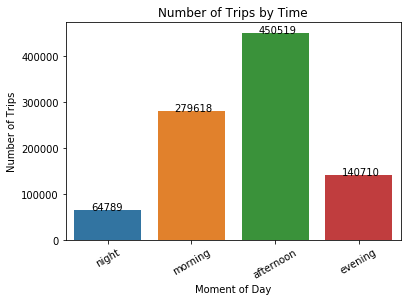

In [30]:
g = sns.countplot(data.start_moment)
for p in g.patches:
    g.text(p.get_x()+0.2, p.get_height()+1, '%i' % p.get_height(), size = 10)
g.set_xticklabels(g.xaxis.get_majorticklabels(), rotation=30)
plt.title('Number of Trips by Time')
plt.xlabel('Moment of Day')
plt.ylabel('Number of Trips')

### <font color='red'>2.4) Use <i>seaborn.countplot()</i> to plot the number of trips per weekday and per time of day</font>

Text(0,0.5,'Number of Trips')

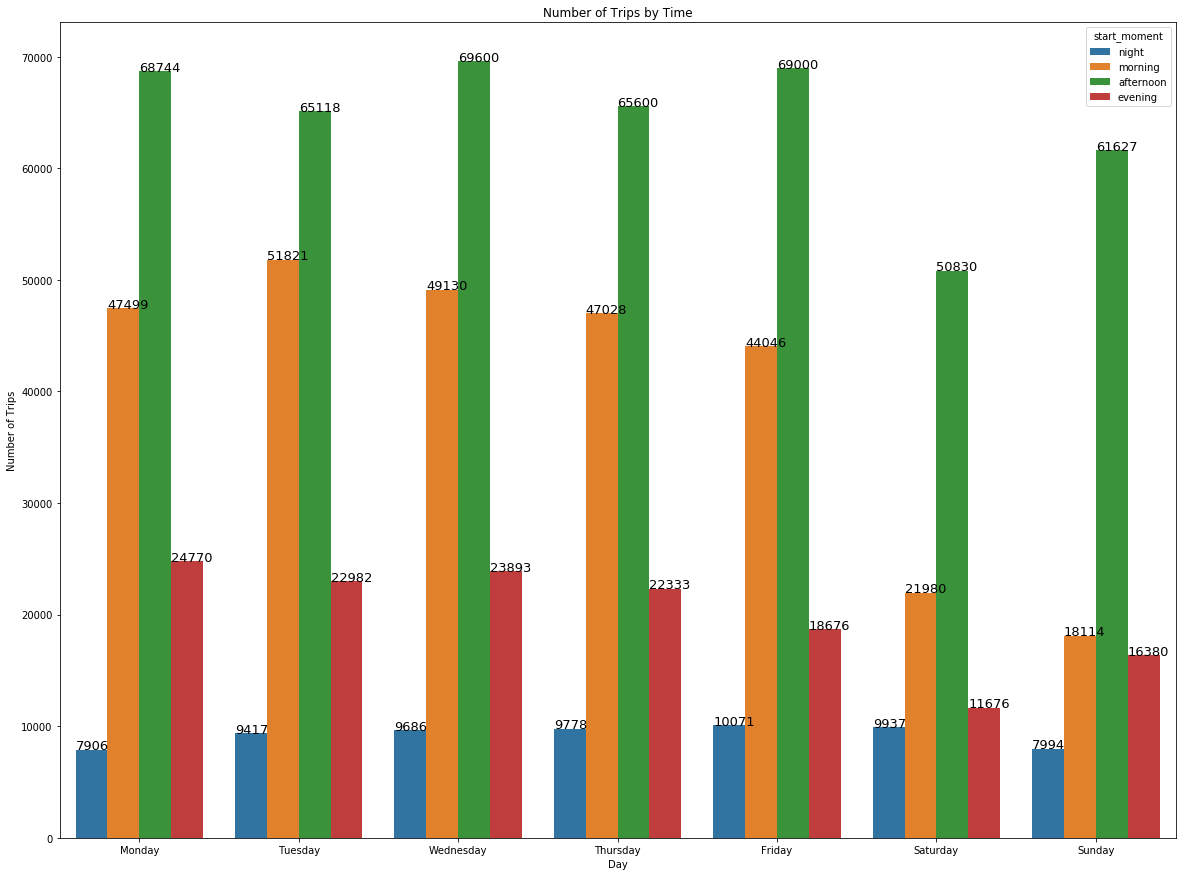

In [31]:
plt.figure(figsize=[20,15])
g = sns.countplot(data['start_day'], hue=data['start_moment'])
for p in g.patches:
    g.text(p.get_x()+0.0001, p.get_height()+1, '%i' % p.get_height(), size = 13)
plt.title('Number of Trips by Time')
plt.xlabel('Day')
plt.ylabel('Number of Trips')

## 3) Is circle trip <font color='blue'> (5 min) </font>

### <font color='red'>3.1) Define a new binary column, with 1 if trip was loopy, 0 otherwise. You can use a boolean comparison of two columns of the dataframe:</font>

- example of boolean condition : <b>data.column_1 == data.column_2</b>

In [32]:
data.sample(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_day,start_day_again,is_weekend,start_moment
800923,239,2015-06-26 13:18:00,2015-06-26 13:22:00,394,E 9 St & Avenue C,40.725213,-73.977688,511,E 14 St & Avenue B,40.729387,-73.977724,17050,Subscriber,1979.0,2,Friday,Friday,0,afternoon
801614,1276,2015-06-26 13:38:00,2015-06-26 13:59:00,2012,E 27 St & 1 Ave,40.739445,-73.976806,330,Reade St & Broadway,40.714505,-74.005628,19354,Subscriber,1983.0,1,Friday,Friday,0,afternoon


In [33]:
data['is_circle_trip'] = data.apply(lambda x: 1 if x['start station id'] == x['end station id'] else 0, axis = 1)
# pada saat kita harus menulis fungsi lambda, kita butuh dua kolom berbeda. sehingga untuk mewakili x, tidak bisa pakai satu
# kolom itu saja, jadinya harus pakai satu dataframe
#data['is_circle_trip'] = data['start station id'] == data['end station id']
#### USE A COMPARISON OF TWO COLUMNS OF THE DATAFRAME TO CHECK FOR A LOOP ####

In [34]:
data[['start station name', 'end station name', 'is_circle_trip']].sample(3)

,start station name,end station name,is_circle_trip
401575,Willoughby Ave & Hall St,Fulton St & Grand Ave,0
509639,Broadway & W 49 St,E 39 St & 2 Ave,0
775323,West Thames St,South End Ave & Liberty St,0


In [35]:
pd.set_option('display.max_columns', None)
data.sample(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_day,start_day_again,is_weekend,start_moment,is_circle_trip
270467,681,2015-06-10 15:42:00,2015-06-10 15:54:00,174,E 25 St & 1 Ave,40.738177,-73.977387,402,Broadway & E 22 St,40.740343,-73.989551,16287,Subscriber,1983.0,2,Wednesday,Wednesday,0,afternoon,0
821103,1688,2015-06-26 20:59:00,2015-06-26 21:27:00,331,Pike St & Monroe St,40.711731,-73.991930,331,Pike St & Monroe St,40.711731,-73.991930,22189,Subscriber,1962.0,1,Friday,Friday,0,evening,1


### <font color='red'>3.2) Print the proportion of circle trips in the dataset</font>

In [36]:
data['is_circle_trip'].sum()/data['is_circle_trip'].count()

0.0217509800819977

## 4) Understanding trip evolution in June <font color='blue'> (15 min) </font>

### <font color='red'>4.1) Add a new column with the trip day number. Since all trips in the dataset occured in June, we will name this column "june_day". You can use the <i>datetime.day</i> attribute of the starttime</font>

In [37]:
data['june_day'] = data['starttime'].apply(lambda x: x.day)
#### ADD A NEW FEATURE: THE DAY IN JUNE ####
                    #### HINT : use data.starttime.apply(your_lambda_function) #####

In [38]:
data[['june_day', 'starttime']].sample(2)

,june_day,starttime
191400,8,2015-06-08 10:46:00
595502,20,2015-06-20 13:12:00


### <font color='red'>4.2) Group by the columns with respect to day in June, using <i>data.groupby()</i></font>

In [39]:
grouped_by_data = data.groupby(data['june_day'], as_index = False)

In [40]:
grouped_by_data.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_day,start_day_again,is_weekend,start_moment,is_circle_trip,june_day
0,1338,2015-06-01 00:00:00,2015-06-01 00:22:00,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1,Monday,Monday,0,night,0,1
1,290,2015-06-01 00:00:00,2015-06-01 00:05:00,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1,Monday,Monday,0,night,0,1
2,634,2015-06-01 00:01:00,2015-06-01 00:11:00,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1,Monday,Monday,0,night,0,1
3,159,2015-06-01 00:01:00,2015-06-01 00:04:00,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1,Monday,Monday,0,night,0,1
4,1233,2015-06-01 00:02:00,2015-06-01 00:22:00,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,1979.0,0,Monday,Monday,0,night,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897731,276,2015-06-30 00:00:00,2015-06-30 00:05:00,326,E 11 St & 1 Ave,40.729538,-73.984267,403,E 2 St & 2 Ave,40.725029,-73.990697,21527,Subscriber,1993.0,2,Tuesday,Tuesday,0,night,0,30
897732,391,2015-06-30 00:00:00,2015-06-30 00:07:00,325,E 19 St & 3 Ave,40.736245,-73.984738,440,E 45 St & 3 Ave,40.752554,-73.972826,17841,Subscriber,1976.0,1,Tuesday,Tuesday,0,night,0,30
897733,546,2015-06-30 00:01:00,2015-06-30 00:10:00,368,Carmine St & 6 Ave,40.730386,-74.002150,438,St Marks Pl & 1 Ave,40.727791,-73.985649,17563,Subscriber,1970.0,1,Tuesday,Tuesday,0,night,0,30
897734,495,2015-06-30 00:01:00,2015-06-30 00:09:00,294,Washington Square E,40.730494,-73.995721,474,5 Ave & E 29 St,40.745168,-73.986831,18086,Subscriber,1987.0,1,Tuesday,Tuesday,0,night,0,30


In [41]:
#### GROUP THE DATA BY JUNE DAY ####
df = grouped_by_data.aggregate({'tripduration': pd.Series.count, 'start station id': pd.Series.nunique})
df.columns = ['june_day', 'numberoftrips', 'uniqueStartstationid']
df.head()

,june_day,numberoftrips,uniqueStartstationid
0,1,15256,318
1,2,11962,318
2,3,34422,319
3,4,32659,319
4,5,31186,319


### <font color='red'>4.3) Aggregate the grouped by data with respect to mean weekend, and number of trips, using the <i>.count()</i> and <i>.mean()</i> methods of <i>data.groupby()</i></font>

In [42]:
aggregate_count_trips = grouped_by_data.count()
aggregate_weekend = grouped_by_data.mean()

In [43]:
aggregate_count_trips.head()

,june_day,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_day,start_day_again,is_weekend,start_moment,is_circle_trip
0,1,15256,15256,15256,15256,15256,15256,15256,15256,15256,15256,15256,15256,15256,15256,15256,15256,15256,15256,15256,15256
1,2,11962,11962,11962,11962,11962,11962,11962,11962,11962,11962,11962,11962,11962,11962,11962,11962,11962,11962,11962,11962
2,3,34422,34422,34422,34422,34422,34422,34422,34422,34422,34422,34422,34422,34422,34422,34422,34422,34422,34422,34422,34422
3,4,32659,32659,32659,32659,32659,32659,32659,32659,32659,32659,32659,32659,32659,32659,32659,32659,32659,32659,32659,32659
4,5,31186,31186,31186,31186,31186,31186,31186,31186,31186,31186,31186,31186,31186,31186,31186,31186,31186,31186,31186,31186


In [44]:
aggregate_weekend.head()

,june_day,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,is_weekend,is_circle_trip
0,1,627.730991,450.520713,40.734524,-73.990879,453.176390,40.734646,-73.990806,18137.335671,1975.928028,1.130637,0.0,0.014224
1,2,614.143956,454.560609,40.735852,-73.990253,453.535278,40.735498,-73.990682,18051.873683,1975.822939,1.136516,0.0,0.014379
2,3,774.042734,461.436087,40.735366,-73.991243,458.232671,40.735033,-73.991357,18112.613561,1975.976149,1.102812,0.0,0.019116
3,4,745.476836,458.591414,40.735692,-73.991034,459.198046,40.735406,-73.991197,18116.641875,1976.104535,1.117181,0.0,0.015310
4,5,761.503655,457.455397,40.734856,-73.991007,454.380716,40.734594,-73.991221,18135.890528,1976.267203,1.101776,0.0,0.017636


### <font color='red'>4.4) Understand what the code below does. How do you understand the plots ? You can look up the following functions:</font>
- fig, ax1 = plt.subplots()
- ax2=ax1.twinx()
- ax1.plot(), ax2.plot()
- any other options to set the ticks labels, colors, titles ...

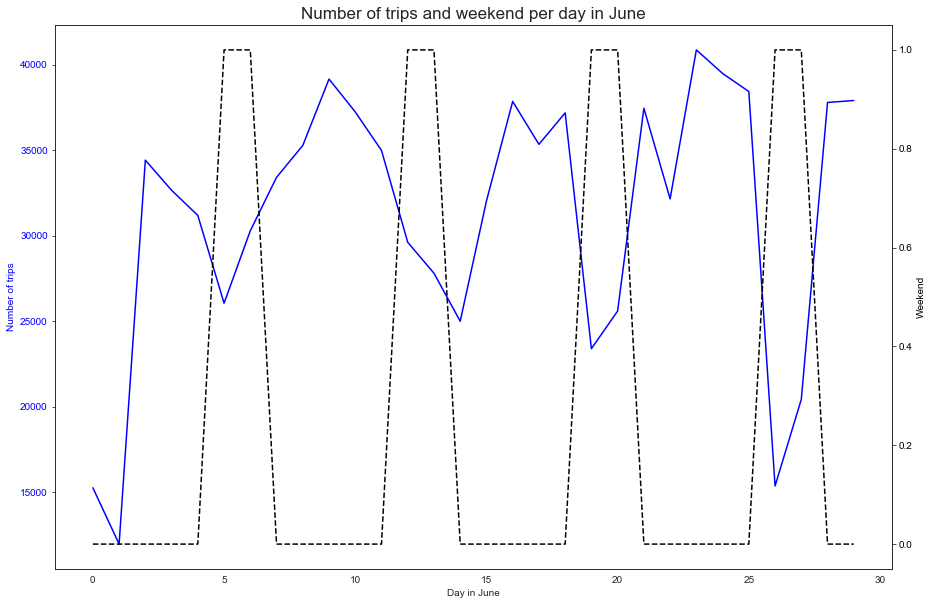

In [45]:
sns.set_style('white')

fig, ax1 = plt.subplots(figsize=(15,10))

june_day = aggregate_count_trips.index

number_trips = aggregate_count_trips.tripduration
ax1.plot(june_day, number_trips, 'b')
ax1.set_xlabel('Day in June')
for ticklabel in ax1.get_yticklabels():
    ticklabel.set_color('b')
ax1.set_ylabel('Number of trips',color='b')

ax2 = ax1.twinx() #add another axis
weekend = aggregate_weekend['is_weekend']
ax2.plot(june_day, weekend, 'k--')
for ticklabel in ax2.get_yticklabels():
    ticklabel.set_color('k')
ax2.set_ylabel('Weekend',color='k')
plt.title('Number of trips and weekend per day in June', fontsize=17)
plt.show()

#start_moment

Kelihatan bahwa jumlah trip turun saat <i>weekend</i>.

## 5) Trip distances and speeds <font color='blue'> (15 min) </font>

### <font color='red'>Import the haversine package, that computes the haversine distance from one coordinate to another</font>

In [46]:
data.sample(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_day,start_day_again,is_weekend,start_moment,is_circle_trip,june_day
271389,451,2015-06-10 16:10:00,2015-06-10 16:17:00,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,293,Lafayette St & E 8 St,40.730287,-73.990765,18828,Subscriber,1949.0,1,Wednesday,Wednesday,0,afternoon,0,10
783786,1099,2015-06-25 21:44:00,2015-06-25 22:03:00,327,Vesey Pl & River Terrace,40.715338,-74.016584,482,W 15 St & 7 Ave,40.739355,-73.999318,15943,Subscriber,1977.0,1,Thursday,Thursday,0,evening,0,25
101376,1401,2015-06-05 09:11:00,2015-06-05 09:34:00,475,E 16 St & Irving Pl,40.735243,-73.987586,471,Grand St & Havemeyer St,40.712868,-73.956981,20830,Subscriber,1981.0,2,Friday,Friday,0,morning,0,5
737804,114,2015-06-24 19:08:00,2015-06-24 19:10:00,485,W 37 St & 5 Ave,40.750380,-73.983390,362,Broadway & W 37 St,40.751726,-73.987535,21061,Subscriber,1978.0,1,Wednesday,Wednesday,0,evening,0,24
733744,474,2015-06-24 18:10:00,2015-06-24 18:18:00,293,Lafayette St & E 8 St,40.730287,-73.990765,537,Lexington Ave & E 24 St,40.740259,-73.984092,18698,Subscriber,1984.0,2,Wednesday,Wednesday,0,afternoon,0,24


In [47]:
pd.set_option('display.max_columns', None)
data.sample(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_day,start_day_again,is_weekend,start_moment,is_circle_trip,june_day
651867,615,2015-06-22 14:26:00,2015-06-22 14:36:00,507,E 25 St & 2 Ave,40.739126,-73.979738,339,Avenue D & E 12 St,40.725806,-73.974225,16405,Subscriber,1956.0,1,Monday,Monday,0,afternoon,0,22
268732,233,2015-06-10 14:46:00,2015-06-10 14:50:00,285,Broadway & E 14 St,40.734546,-73.990741,300,Shevchenko Pl & E 7 St,40.728145,-73.990214,14793,Subscriber,1976.0,1,Wednesday,Wednesday,0,afternoon,0,10


In [48]:
help(pd.set_option)

Help on CallableDynamicDoc in module pandas._config.config object:

class CallableDynamicDoc(builtins.object)
 |  CallableDynamicDoc(func, doc_tmpl)
 |  
 |  Methods defined here:
 |  
 |  __call__(self, *args, **kwds)
 |      Call self as a function.
 |  
 |  __init__(self, func, doc_tmpl)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [49]:
from haversine import haversine

In [50]:
help(haversine)

Help on function haversine in module haversine.haversine:

haversine(point1, point2, unit=<Unit.KILOMETERS: 'km'>)
    Calculate the great-circle distance between two points on the Earth surface.
    
    Takes two 2-tuples, containing the latitude and longitude of each point in decimal degrees,
    and, optionally, a unit of length.
    
    :param point1: first point; tuple of (latitude, longitude) in decimal degrees
    :param point2: second point; tuple of (latitude, longitude) in decimal degrees
    :param unit: a member of haversine.Unit, or, equivalently, a string containing the
                 initials of its corresponding unit of measurement (i.e. miles = mi)
                 default 'km' (kilometers).
    
    Example: ``haversine((45.7597, 4.8422), (48.8567, 2.3508), unit=Unit.METERS)``
    
    Precondition: ``unit`` is a supported unit (supported units are listed in the `Unit` enum)
    
    :return: the distance between the two points in the requested unit, as a float.
 

### <font color='red'>Understand how the <i>haversine</i> function from the package can be used to compute a distance by running the following blocks</font>

In [51]:
x = data.iloc[6]

In [52]:
x

tripduration                               766
starttime                  2015-06-01 00:04:00
stoptime                   2015-06-01 00:17:00
start station id                           346
start station name         Bank St & Hudson St
start station latitude               40.736529
start station longitude              -74.00618
end station id                            2003
end station name               1 Ave & E 18 St
end station latitude                 40.733812
end station longitude               -73.980544
bikeid                                   15978
usertype                            Subscriber
birth year                              1976.0
gender                                       1
start_day                               Monday
start_day_again                         Monday
is_weekend                                   0
start_moment                             night
is_circle_trip                               0
june_day                                     1
Name: 6, dtyp

In [53]:
haversine((x['start station latitude'], x['start station longitude']), (x['end station latitude'], x['end station longitude']))

2.18101973053599

In [54]:
print('Traveled haversine distance for trip 0: {:.2f} kilometers'.format(
    haversine((x['start station latitude'], x['start station longitude']),
              (x['end station latitude'], x['end station longitude']))))#,miles=True))
#by default, it will give result in kilometers. we can change it to miles by adding miles=True in the hyperparameter

Traveled haversine distance for trip 0: 2.18 kilometers


### <font color='red'>5.1) Complete the following function so it returns, for a given observation, the haversine distance from a start station to the end station</font>

In [55]:
def distance_stations(x):
    start_lat = x['start station latitude']
    start_long = x['start station longitude']
    end_lat = x['end station latitude']
    end_long = x['end station longitude']
    return haversine((start_lat,start_long), (end_lat,end_long))
#### COMPLETE THE FUNCTION SO IT RETURNS THE DISTANCE FROM START TO END ####

### <font color='red'>5.2) Please create a new variable called 'traveled_distance' and use distance_stations function to compute the distance between 2 stations</font>

In [56]:
help(pd.DataFrame.apply)

Help on function apply in module pandas.core.frame:

apply(self, func, axis=0, raw=False, result_type=None, args=(), **kwds)
    Apply a function along an axis of the DataFrame.
    
    Objects passed to the function are Series objects whose index is
    either the DataFrame's index (``axis=0``) or the DataFrame's columns
    (``axis=1``). By default (``result_type=None``), the final return type
    is inferred from the return type of the applied function. Otherwise,
    it depends on the `result_type` argument.
    
    Parameters
    ----------
    func : function
        Function to apply to each column or row.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Axis along which the function is applied:
    
        * 0 or 'index': apply function to each column.
        * 1 or 'columns': apply function to each row.
    
    raw : bool, default False
        Determines if row or column is passed as a Series or ndarray object:
    
        * ``False`` : passes each row or co

In [57]:
data['traveled_distance'] = data.apply(distance_stations, axis = 1)

In [58]:
data[['start station name', 'end station name', 'traveled_distance']].sample(5)

,start station name,end station name,traveled_distance
480846,Spruce St & Nassau St,Warren St & Church St,0.473146
439917,Pershing Square North,Broadway & W 55 St,1.530948
614913,E 3 St & 1 Ave,W 13 St & 5 Ave,1.323374
418229,E 11 St & 2 Ave,E 19 St & 3 Ave,0.663296
7460,South End Ave & Liberty St,Allen St & Rivington St,2.377481


### <font color='red'>5.3) Show <i>samples</i> of data, and see how the traveled distance has been added as a new feature in the dataset</font>

In [59]:
distance_station_data = data[['start station name', 'end station name', 'traveled_distance']]

In [60]:
distance_station_data.head()

,start station name,end station name,traveled_distance
0,MacDougal St & Prince St,W 45 St & 8 Ave,3.778532
1,St Marks Pl & 1 Ave,Allen St & E Houston St,0.701381
2,Greenwich Ave & Charles St,W 26 St & 10 Ave,1.625823
3,Allen St & Hester St,Forsyth St & Broome St,0.326548
4,University Pl & E 14 St,S 5 Pl & S 4 St,3.780067


In [61]:
distance_station_data[(distance_station_data['start station name'] == 'MacDougal St & Prince St') & (distance_station_data['end station name'] == 'W 45 St & 8 Ave')].head()

,start station name,end station name,traveled_distance
0,MacDougal St & Prince St,W 45 St & 8 Ave,3.778532
84248,MacDougal St & Prince St,W 45 St & 8 Ave,3.778532
143919,MacDougal St & Prince St,W 45 St & 8 Ave,3.778532
183876,MacDougal St & Prince St,W 45 St & 8 Ave,3.778532
211443,MacDougal St & Prince St,W 45 St & 8 Ave,3.778532


In [62]:
distance_station_data[distance_station_data.traveled_distance == 0].head()

,start station name,end station name,traveled_distance
88,Lexington Ave & E 24 St,Lexington Ave & E 24 St,0.0
101,South End Ave & Liberty St,South End Ave & Liberty St,0.0
107,Broadway & E 14 St,Broadway & E 14 St,0.0
111,West St & Chambers St,West St & Chambers St,0.0
119,E 14 St & Avenue B,E 14 St & Avenue B,0.0


### <font color='red'>5.4) Compute the average speed (in km/h) by dividing two dataframe columns</font>

In [63]:
data['trip_duration_hours'] = data['tripduration'].apply(lambda x: x/3600)

In [64]:
data[['tripduration', 'trip_duration_hours']].sample(5)

,tripduration,trip_duration_hours
324537,748,0.207778
266525,999,0.277500
167113,616,0.171111
455413,522,0.145000
262870,1655,0.459722


In [65]:
data['average_speed'] = data.apply(lambda x: x['traveled_distance']/(x['trip_duration_hours']), axis = 1)
col = ['traveled_distance', 'tripduration', 'average_speed']
data[col].sample(5)
#### COMPUTE THE AVERAGE SPEED HERE ####

,traveled_distance,tripduration,average_speed
54860,5.169836,1899,9.800637
830043,1.747511,867,7.256101
527378,0.751042,371,7.287740
516552,0.734789,266,9.944511
675360,2.323151,773,10.819331


In [66]:
mean_speed = mean(data['average_speed'][data['average_speed'] != 0])
print(mean_speed)

8.686372349654757


In [82]:
data['average_speed'].median()

8.686372349654757

In [68]:
data['average_speed'].mean()

8.497435237692601

In [69]:
data[data['average_speed'] > 200]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_day,start_day_again,is_weekend,start_moment,is_circle_trip,june_day,traveled_distance,trip_duration_hours,average_speed
352938,66,2015-06-12 18:00:00,2015-06-12 18:01:00,385,E 55 St & 2 Ave,40.757973,-73.966033,361,Allen St & Hester St,40.716059,-73.991908,20957,Subscriber,1953.0,1,Friday,Friday,0,afternoon,0,12,5.145346,0.018333,280.655240
781464,72,2015-06-25 20:16:00,2015-06-25 20:17:00,327,Vesey Pl & River Terrace,40.715338,-74.016584,515,W 43 St & 10 Ave,40.760094,-73.994618,21654,Subscriber,1978.0,2,Thursday,Thursday,0,evening,0,25,5.309648,0.020000,265.482382


In [70]:
col = ['start station name', 'end station name', 'traveled_distance', 'average_speed']
data[data.average_speed == 0][col].head(5)

,start station name,end station name,traveled_distance,average_speed
88,Lexington Ave & E 24 St,Lexington Ave & E 24 St,0.0,0.0
101,South End Ave & Liberty St,South End Ave & Liberty St,0.0,0.0
107,Broadway & E 14 St,Broadway & E 14 St,0.0,0.0
111,West St & Chambers St,West St & Chambers St,0.0,0.0
119,E 14 St & Avenue B,E 14 St & Avenue B,0.0,0.0


### <font color='red'>Run the following block to compute the mean speed on non-loopy trips </font>

In [71]:
mean_speed = mean(data['average_speed'][data['average_speed'] != 0])
mean_speed

8.686372349654757

In [72]:
data[data.average_speed != 0].average_speed.mean()

8.686372349654757

### <font color='red'>5.5) Keep only trips for which the speed is under 50 km/h </font>

In [73]:
data = data[data['average_speed'] < 50]
    
    #### ENTER YOUR FILTERING CONDITION HERE ####
            #### WARNING : THIS WILL ERASE THE RAW DATA SO MAKE SURE IT IS CORRECT! ####
            #### MAKE TESTS ON THE SLICING CONDITION BEFORE ERASING THE DATA ####]

In [74]:
data[data['average_speed'] > 50]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_day,start_day_again,is_weekend,start_moment,is_circle_trip,june_day,traveled_distance,trip_duration_hours,average_speed


In [75]:
data.shape

(935588, 24)

### <font color='red'>What does the following block do ?</font>

In [81]:
data.loc[data['average_speed']==0,'average_speed'] = mean_speed # mengganti yang speednya 0 dengan rata-rata speed
# karena ada durasi, speed nggak mungkin 0. paling masuk akal dengan menggantinya dengan mean speed
# perlu dilakukan karena 

### <font color='red'>5.6) Using <i>seaborn.distplot</i>, plot the distribution of speeds</font>

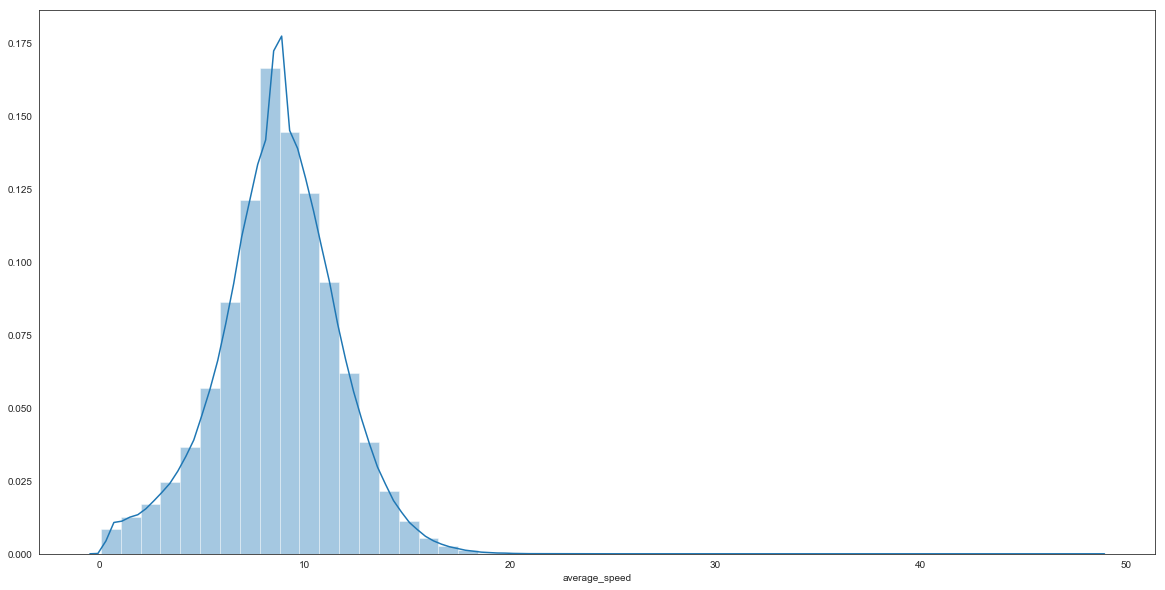

In [77]:
plt.figure(figsize=(20,10))
sns.distplot(data['average_speed'])
#### PLOT THE DISTRIBUTION OF SPEEDS ####
plt.show()

### <font color='red'>5.7) Subsidiary question : plot the average speed vs. the total distance. What do you observe ? You can use the following function: </font>
- seaborn.regplot()
- data_sample = data.sample(1000) so as not to overload the graph

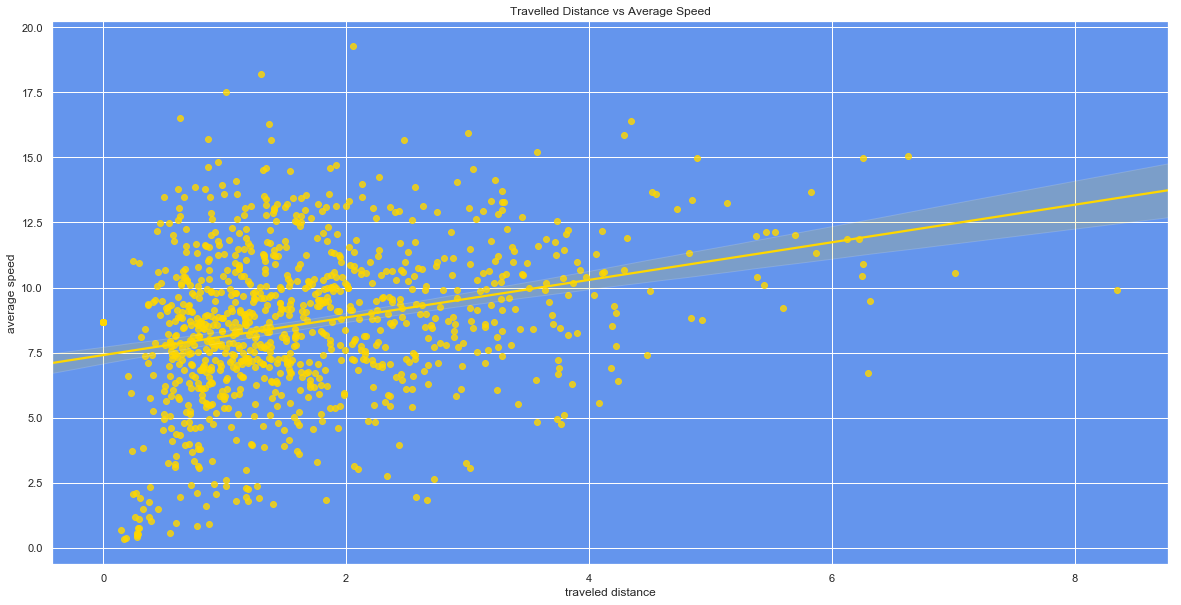

In [85]:
data_sample = data.sample(1000)
plt.figure(figsize=[20,10])
sns.regplot(x = 'traveled_distance', y = 'average_speed', data=data_sample, color = 'gold')
sns.set(rc={'axes.facecolor':'cornflowerblue'})#, 'figure.facecolor':'cornflowerblue'})
plt.xlabel('traveled distance')
plt.ylabel('average speed')
plt.title('Travelled Distance vs Average Speed')
plt.show()

standard deviation masih jauh. korelasinya tidak tinggi. korelasinya positif.
ada yang speednya kecil jaraknya tinggi, speednya tinggi jaraknya dekat.

# Save dataset to csv file

In [79]:
data.columns.values

array(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'usertype', 'birth year', 'gender', 'start_day', 'start_day_again',
       'is_weekend', 'start_moment', 'is_circle_trip', 'june_day',
       'traveled_distance', 'trip_duration_hours', 'average_speed'],
      dtype=object)

In [86]:
col = ['tripduration', 'starttime', 'stoptime', 'start station id', 'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name', 'end station latitude', 'end station longitude',
       'bikeid', 'usertype', 'birth year', 'gender', 'start_day', 'is_weekend', 'start_moment', 'is_circle_trip', 'june_day',
       'traveled_distance', 'average_speed']
data[col].to_csv('data_after_feature_engineering.csv', index = False)

## 2) Exercise <font color='blue'> (10 min) </font>

### <font color='red'>2.1) Any other interesting features that we need to create to enrich the data?</font>

In [87]:
data_2 = pd.read_csv("data_after_feature_engineering.csv")

In [89]:
data_2.sample(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_day,is_weekend,start_moment,is_circle_trip,june_day,traveled_distance,average_speed
342953,1328,2015-06-12 14:09:00,2015-06-12 14:31:00,498,Broadway & W 32 St,40.748549,-73.988084,2010,Grand St & Greene St,40.721655,-74.002347,15486,Customer,1979.0,0,Friday,0,afternoon,0,12,3.222901,8.736779
671301,146,2015-06-22 21:43:00,2015-06-22 21:46:00,423,W 54 St & 9 Ave,40.765849,-73.986905,468,Broadway & W 55 St,40.765265,-73.981923,20849,Subscriber,1981.0,1,Monday,0,evening,0,22,0.424542,10.468161
742163,394,2015-06-24 20:44:00,2015-06-24 20:50:00,363,West Thames St,40.708347,-74.017134,304,Broadway & Battery Pl,40.704633,-74.013617,14798,Subscriber,1972.0,1,Wednesday,0,evening,0,24,0.508355,4.644865
98211,188,2015-06-05 08:11:00,2015-06-05 08:14:00,453,W 22 St & 8 Ave,40.744751,-73.999154,459,W 20 St & 11 Ave,40.746745,-74.007756,15469,Subscriber,1989.0,1,Friday,0,morning,0,5,0.757834,14.511710
653777,1074,2015-06-22 15:34:00,2015-06-22 15:52:00,511,E 14 St & Avenue B,40.729387,-73.977724,442,W 27 St & 7 Ave,40.746647,-73.993915,17527,Subscriber,1990.0,1,Monday,0,afternoon,0,22,2.354633,7.892623
708156,1582,2015-06-24 07:25:00,2015-06-24 07:51:00,375,Mercer St & Bleecker St,40.726795,-73.996951,290,2 Ave & E 58 St,40.760203,-73.964785,19536,Subscriber,1962.0,2,Wednesday,0,morning,0,24,4.598172,10.463602
854726,745,2015-06-28 19:09:00,2015-06-28 19:21:00,301,E 2 St & Avenue B,40.722174,-73.983688,382,University Pl & E 14 St,40.734927,-73.992005,16334,Subscriber,1984.0,1,Sunday,1,evening,0,28,1.581761,7.643408
22783,592,2015-06-02 16:31:00,2015-06-02 16:41:00,465,Broadway & W 41 St,40.755136,-73.986580,499,Broadway & W 60 St,40.769155,-73.981918,15174,Subscriber,1961.0,2,Tuesday,0,afternoon,0,2,1.607583,9.775843
334863,450,2015-06-12 09:17:00,2015-06-12 09:24:00,439,E 4 St & 2 Ave,40.726281,-73.989780,497,E 17 St & Broadway,40.737050,-73.990093,14629,Subscriber,1983.0,2,Friday,0,morning,0,12,1.197765,9.582120
199541,460,2015-06-08 16:20:00,2015-06-08 16:27:00,509,9 Ave & W 22 St,40.745497,-74.001971,247,Perry St & Bleecker St,40.735354,-74.004831,19590,Subscriber,1978.0,1,Monday,0,afternoon,0,8,1.153330,9.026057


bikin variabel umur.

bikin variabel kelompok usia.

grouping orang-orang yang mulai dan selesainya di waktu yang sama dan tempat yang sama, siapa tahu mereka memang bareng-bareng.